In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
import io

### Data Collection

In [3]:
cd "C:\Users\zaida\OneDrive\Desktop\Machine Learning\ML DATASET\Calories"

C:\Users\zaida\OneDrive\Desktop\Machine Learning\ML DATASET\Calories


In [4]:
calories = pd.read_csv("calories.csv")

In [5]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [6]:
exercise = pd.read_csv("exercise.csv")

In [7]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [8]:
# Combining two dataframe 

In [9]:
df = pd.concat([exercise,calories["Calories"]],axis=1)

In [10]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [11]:
# Cheacking the number of rows and column

In [12]:
df.shape

(15000, 9)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [14]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [15]:
df.isna().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [16]:
# Drop unwanted variable
df.drop("User_ID",axis=1,inplace=True)

In [17]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [18]:
# Encoding

In [19]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [20]:
# In Gender There is an nominal categoriacal data so i will use Onehotencoder

In [21]:
from sklearn.preprocessing import OneHotEncoder

In [22]:
one = OneHotEncoder(drop='first')
one

OneHotEncoder(drop='first')

In [23]:
O = one.fit_transform(df[["Gender"]]).toarray()

In [24]:
df["Gender"] = O.astype(int)

In [25]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,0,27,154.0,58.0,10.0,81.0,39.8,35.0


### Visualization

#### Frequency counts and pie Diagram with percentage for variable Gender

<Axes: ylabel='count'>

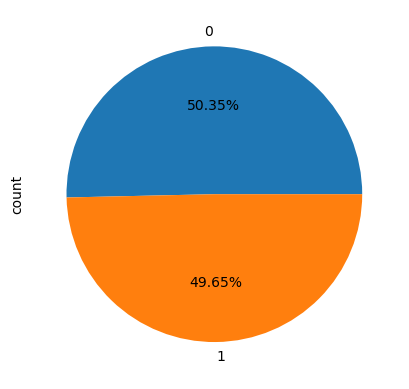

In [26]:
df["Gender"].value_counts().plot(kind="pie",autopct="%.2F%%")

#### Then Cross Tabulation and Stacked Bar plot for variable Duration&Gender

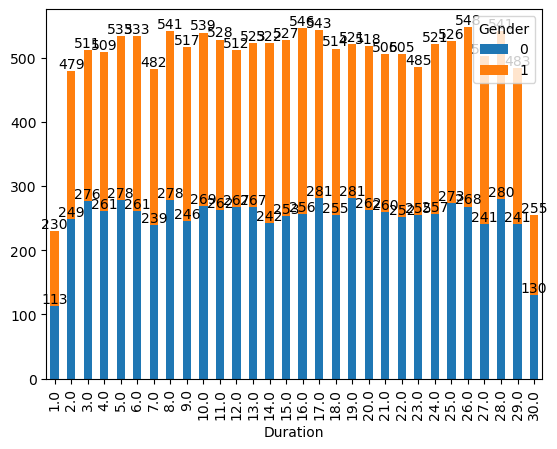

In [30]:
ax=pd.crosstab(df.Duration,df.Gender).plot(kind="bar",stacked=True)
for i in ax.containers:
    ax.bar_label(i)

#### Histogram, boxplot and Distplot - Age , Height , Weight 

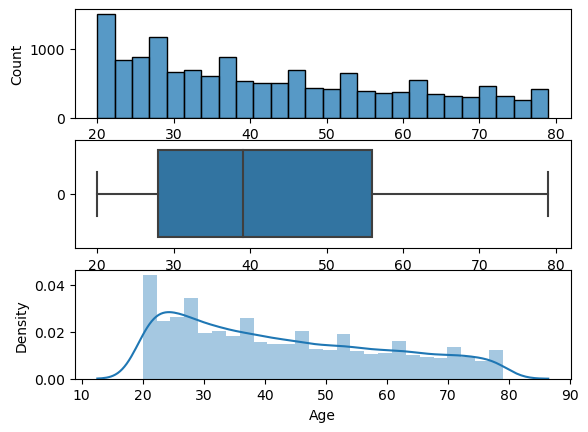

In [27]:
fig,ax=plt.subplots(3,1)
sns.histplot(df.Age,ax=ax[0])
sns.boxplot(df.Age,ax=ax[1],orient="h")
sns.distplot(df.Age,ax=ax[2])
plt.show()

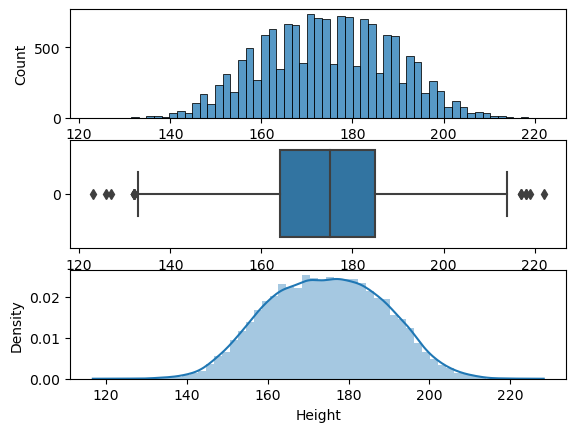

In [28]:
fig,ax=plt.subplots(3,1)
sns.histplot(df.Height,ax=ax[0])
sns.boxplot(df.Height,ax=ax[1],orient="h")
sns.distplot(df.Height,ax=ax[2])
plt.show()

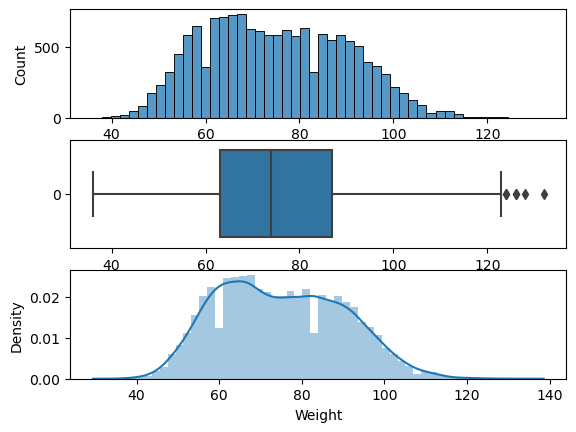

In [29]:
fig,ax=plt.subplots(3,1)
sns.histplot(df.Weight,ax=ax[0])
sns.boxplot(df.Weight,ax=ax[1],orient="h")
sns.distplot(df.Weight,ax=ax[2])
plt.show()

<Axes: >

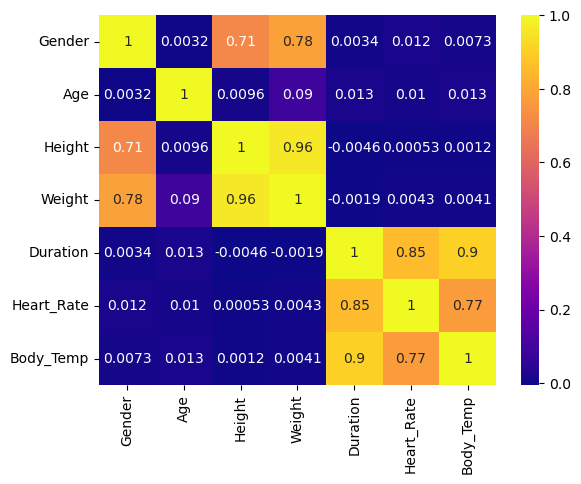

In [35]:
sns.heatmap(df.drop("Calories",axis=1).corr(),annot=True,cmap="plasma")

In [ ]:
# Deleting those columns who are creating multicolinearity

In [32]:
newdf = df.drop(["Duration","Weight"],axis=1)

<Axes: >

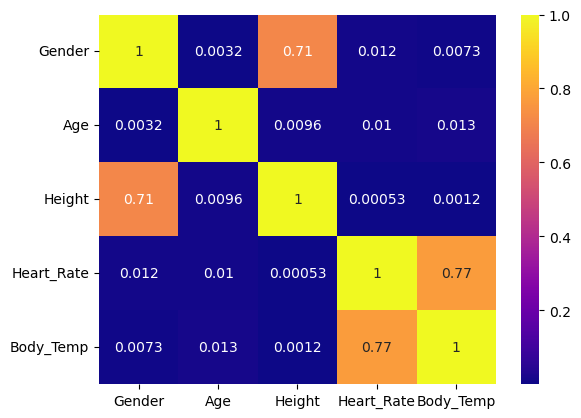

In [34]:
sns.heatmap(newdf.drop("Calories",axis=1).corr(),annot=True,cmap="plasma")

<Axes: xlabel='Calories', ylabel='Density'>

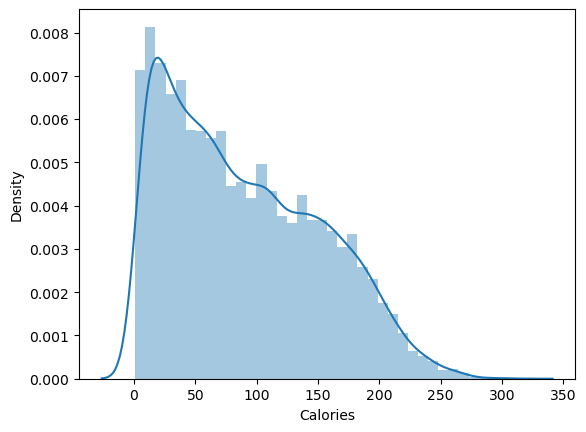

In [35]:
# Distplot of target varaible
sns.distplot(newdf["Calories"])

In [36]:
# SO you can clearly see here my target variable is skewed
newdf["Calories"].skew()

0.5053713740451047

<Axes: xlabel='Calories', ylabel='Density'>

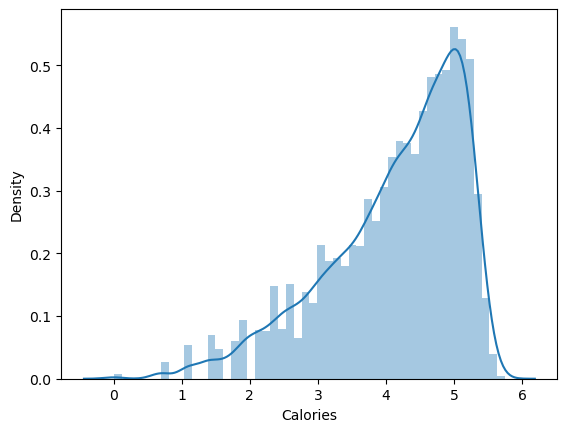

In [37]:
# So i am using log
sns.distplot(np.log(newdf["Calories"]))

In [38]:
# Here it became right skewed
np.log(newdf["Calories"]).skew()

-0.9773516393527459

<Axes: xlabel='Calories', ylabel='Density'>

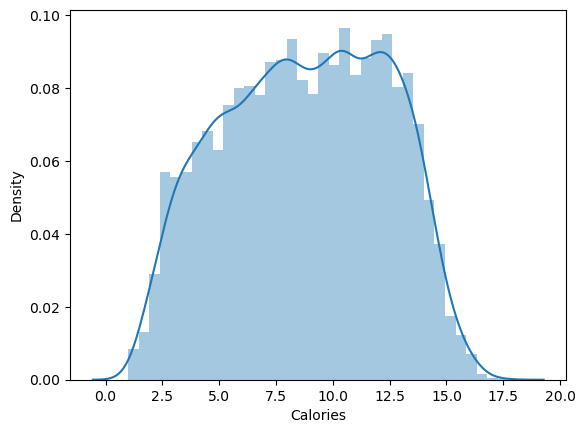

In [42]:
# So i am using sqrt
# This is another transformation that can help reduce the impact of extreme values.
sns.distplot(np.sqrt(newdf["Calories"]))

In [41]:
np.round(np.sqrt(newdf["Calories"]).skew())

-0.0

### Splitting 

In [47]:
X = df.drop("Calories",axis=1)

In [48]:
y = np.sqrt(newdf["Calories"])

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,train_size=0.20)

### Model Building

### Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(Xtrain,ytrain)

LinearRegression()

In [54]:
# Training score
LR.score(Xtrain,ytrain)

0.9887161443159223

In [53]:
# Testing score
LR.score(Xtest,ytest)

0.9884833638651215

### Decision Tree

In [61]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=7)
DT.fit(Xtrain,ytrain)

DecisionTreeRegressor(max_depth=7)

In [62]:
# Training score
DT.score(Xtrain,ytrain)

0.9882262769387423

In [63]:
# Testing score
DT.score(Xtest,ytest)

0.9818535233406953

### Random Forest

In [64]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(Xtrain,ytrain)

RandomForestRegressor()

In [66]:
# Training score
RF.score(Xtrain,ytrain)

0.9994305644433142

In [65]:
# Testing score
RF.score(Xtest,ytest)

0.9957279685010585

### Gradiant Boosting

In [68]:
from sklearn.ensemble import GradientBoostingRegressor

In [69]:
G = GradientBoostingRegressor()

In [70]:
G.fit(Xtrain,ytrain)

GradientBoostingRegressor()

In [72]:
# Training score
G.score(Xtrain,ytrain)

0.9980541523658161

In [71]:
# Testing score
G.score(Xtest,ytest)

0.9973424170386219

 ### Ada Boost

In [73]:
from sklearn.ensemble import AdaBoostRegressor
AB = AdaBoostRegressor()
AB.fit(Xtrain,ytrain)

AdaBoostRegressor()

In [74]:
# Training score
AB.score(Xtrain,ytrain)

0.9779610574604028

In [75]:
# Testing score
AB.score(Xtest,ytest)

0.9764425034617777

### Regression Metric

In [79]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
# I am taking Gradiant Boosting Model for prediction

In [80]:
ypred = G.predict(Xtest)

In [82]:
print("MAE = ",mean_absolute_error(ytest,ypred))

MAE =  0.1365291445096873


In [83]:
print("MSE = ",mean_squared_error(ytest,ypred) )

MSE =  0.03366366104670978


In [84]:
print("RMSE = ",np.sqrt(mean_squared_error(ytest,ypred)))

RMSE =  0.1834765953649396


In [85]:
print("R2 Score = ",r2_score(ytest,ypred))

R2 Score =  0.9973424170386219


In [90]:
print("Adjusted R2 Score = ", 1-(((1-(r2_score(ytest,ypred)))*(len(df)-1))/(len(df)-7-1)))

Adjusted R2 Score =  0.9973411761714441
